In [1]:
from IPython.core.display import Image, display

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  

In [3]:

import matplotlib.pyplot as plt
import numpy as np


In [29]:
from sklearn.model_selection import GridSearchCV

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
def draw_example(ax, x,y,xt=None, yt=None):
  ax.scatter(x[y==0,0],x[y==0,1],color='blue',marker='o', label='class (-)')
  ax.scatter(x[y==1,0],x[y==1,1],color='red',marker='x', label='class (+)')
  if xt is not None:
    if xt.ndim > 1:
      if yt is None:
        ax.scatter(xt[:,0], xt[:,1], marker='s', color='green', label ='$x_t$')
      else:
        ax.scatter(xt[yt==0,0],xt[yt==0,1],color='green',marker='o', label='class (-), test')
        ax.scatter(xt[yt==1,0],xt[yt==1,1],color='green',marker='x', label='class (+), test')
    else:
      if yt is None:
        ax.scatter(xt[0], xt[1], marker='s', color='green', label ='$x_t$')
      else:
        if yt == 0:
          ax.scatter(xt[0], xt[1], marker='o', color='green', label ='$x_t$')
        else:
          ax.scatter(xt[0], xt[1], marker='x', color='green', label ='$x_t$')

def draw_radius(c,x,ax):
  for ii in range(len(x)):
    ax.plot([c[0],x[ii,0]],
            [c[1],x[ii,1]],
            linestyle=':',
            linewidth=2)
    
def draw_votes(y, w, ax):
  labels = ['unit', 'weighted']
  k = len(y)
  bottom = np.zeros(2)
  width = 0.5
  for ii in range(k):
    if y[ii] == 1:
      color = 'red'
    else:
      color = 'blue'
    ax.bar(labels, [1./k, w[ii]], 
           width=width, 
           label='neighbor {0:d}'.format(ii+1),
           bottom = bottom,
           edgecolor='black',
           color=color)
    bottom += np.array([1./k, w[ii]])

In [6]:
class stump(object):
    def __init__(self, v, u, x, y):
        self.v = v
        self.u = u
        cuales_izq = np.where(x[:,v] <= u)[0]
        if np.mean(y[cuales_izq]) < 0:
            self.y_izq = -1
        else:
            self.y_izq = 1
        cuales_dcha = np.where(x[:,v] > u)[0]
        if np.mean(y[cuales_dcha]) < 0:
            self.y_dch = -1
        else:
            self.y_dch = 1
    def predict(self, x):
        n = len(x)
        output = self.y_dch * np.ones(n)
        cuales_izq = np.where(x[:,self.v] <= self.u)[0]
        output[cuales_izq] = self.y_izq
        return output

## Degrees in Telecommunication Engineering, group 95M
# Modern Theory of Detection and Estimation

### Fall 2021

&nbsp;
&nbsp;
&nbsp;
# Machine Learning for classification. Examples in the lecture

&nbsp;
&nbsp;
&nbsp;

**Emilio Parrado Hernández**

Dept. of Signal Processing and Communications

&nbsp;
&nbsp;
&nbsp;




<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

# Contents

This notebook contains the code that I used to generate the plots pasted in the slides of the lecture

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

# Slide 6

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification


In [8]:
h = 0.02  # step size in the mesh

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)
datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]


Problem 0
Prior of class y=0: 0.52
Prior of class y=1: 0.48
Problem 1
Prior of class y=0: 0.57
Prior of class y=1: 0.43
Problem 2
Prior of class y=0: 0.53
Prior of class y=1: 0.47


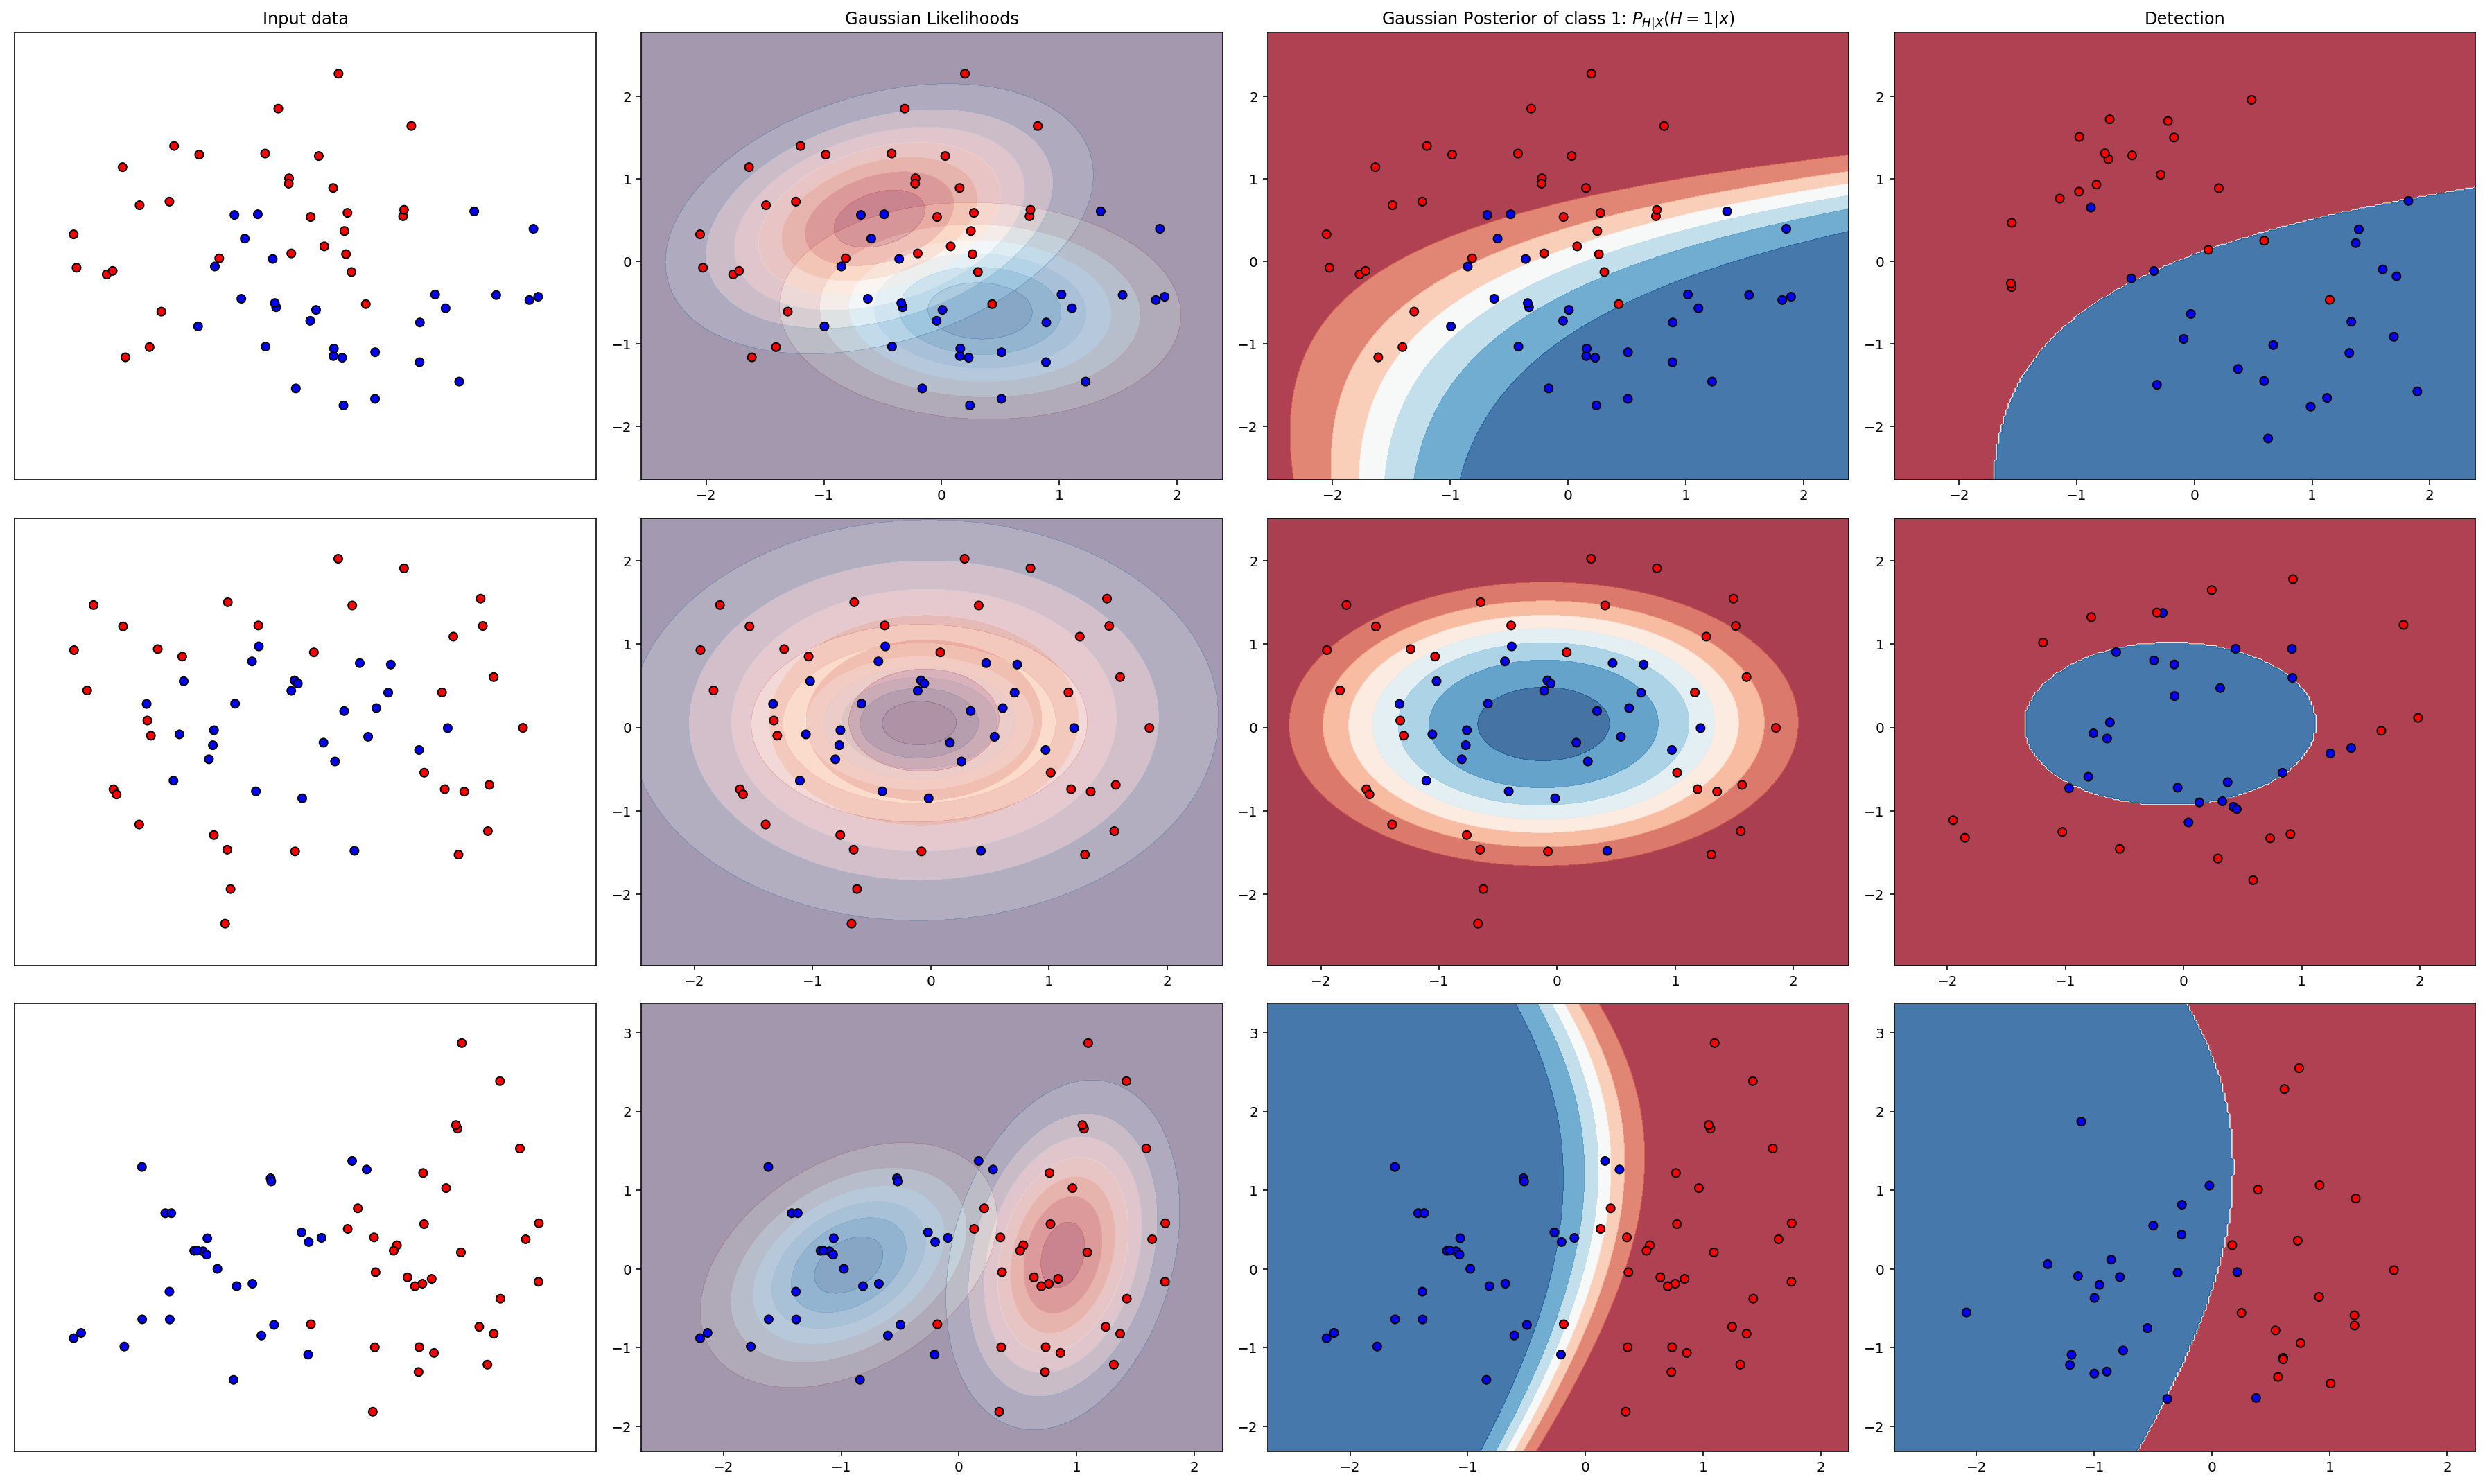

In [10]:



figure, aa = plt.subplots(len(datasets), 4,figsize=(25, 15))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = aa[ds_cnt][0]
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # Learn likelihoods
    m1 = np.mean(X_train[y_train==1,:],0)
    S1 = np.cov(X_train[y_train==1,:],rowvar=False)
    m0 = np.mean(X_train[y_train==0,:],0)
    S0 = np.cov(X_train[y_train==0,:],rowvar=False)
   
    # Learn priors
    P1 = np.mean(y_train)
    P0 = 1-P1
    print("Problem {0:d}".format(ds_cnt))
    print("Prior of class y=0: {0:.2f}".format(P0))
    print("Prior of class y=1: {0:.2f}".format(P1))
    
    # Plot likelihoods
    
    ax = aa[ds_cnt][1]
    if ds_cnt == 0:
        ax.set_title("Gaussian Likelihoods")
    Z1 = st.multivariate_normal.pdf(np.c_[xx.ravel(), yy.ravel()],
                                  mean=m1,
                                  cov=S1)
    # Put the result into a color plot
    Z1 = Z1.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z1, cmap=cm, alpha=0.3)
    
    Z0 = st.multivariate_normal.pdf(np.c_[xx.ravel(), yy.ravel()],
                                  mean=m0,
                                  cov=S0)
    # Put the result into a color plot
    Z0 = Z0.reshape(xx.shape)
    
    ax.contourf(xx, yy, -Z0, cmap=cm, alpha=0.3)


    # Plot the training points
    ax.scatter(
        X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
    )

    # Compute Posteriors
    Evidence = Z0 * P0 + Z1 * P1
    Posterior0 = Z0 * P0 / Evidence
    Posterior1 = Z1 * P1 / Evidence
    
    # Plot posteriors
    
    ax = aa[ds_cnt][2]
    if ds_cnt == 0:
        ax.set_title("Gaussian Posterior of class 1: $P_{H|X}(H=1|x)$")
    ax.contourf(xx, yy, Posterior1, cmap=cm, alpha=0.8)
    ax.scatter(
        X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
    )
    
    # Compute detector
    
    Detection = Posterior1 * 0.
    Detection[Posterior1 > Posterior0] = 1
    
    # Plot detection
    
    ax = aa[ds_cnt][3]
    if ds_cnt == 0:
        ax.set_title("Detection")
    ax.contourf(xx, yy, Detection, cmap=cm, alpha=0.8)
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors="k"
    )
plt.tight_layout()
#plt.show()
plt.savefig('example_1.png')

# Slides 18 to 20

In [11]:
from sklearn.datasets import make_classification, make_moons

x,y = make_classification(n_samples=20, 
                          n_features=2,
                          n_informative=2, 
                          n_redundant=0,
                          n_repeated=0, 
                          n_classes=2, 
                          n_clusters_per_class=2,
                          weights=None, 
                          flip_y=0.01, 
                          class_sep=1.0, 
                          hypercube=False, 
                          shift=0.0, 
                          scale=1.0, 
                          shuffle=True, 
                          random_state=42)
xt = np.array([-0.2, 0.7])

In [12]:

draw_example(ax,x,y,xt)
_=ax.legend()

In [13]:
from sklearn.metrics import pairwise_distances 
distances = pairwise_distances(xt.reshape(1,-1), x,'euclidean') 

# sort all neighbors according to their distance to the test sample
id_neighbors = np.argsort(distances) # indices of the training observations who is the kth neighbor?

sorted_distances = 1e-6+np.sort(distances) # distances to neighbors, how far is the kth neighbor?

# class of each neighbor
class_neighbors = y[id_neighbors]
# weight for each neighbor vote
weight_neighbor = 1./sorted_distances



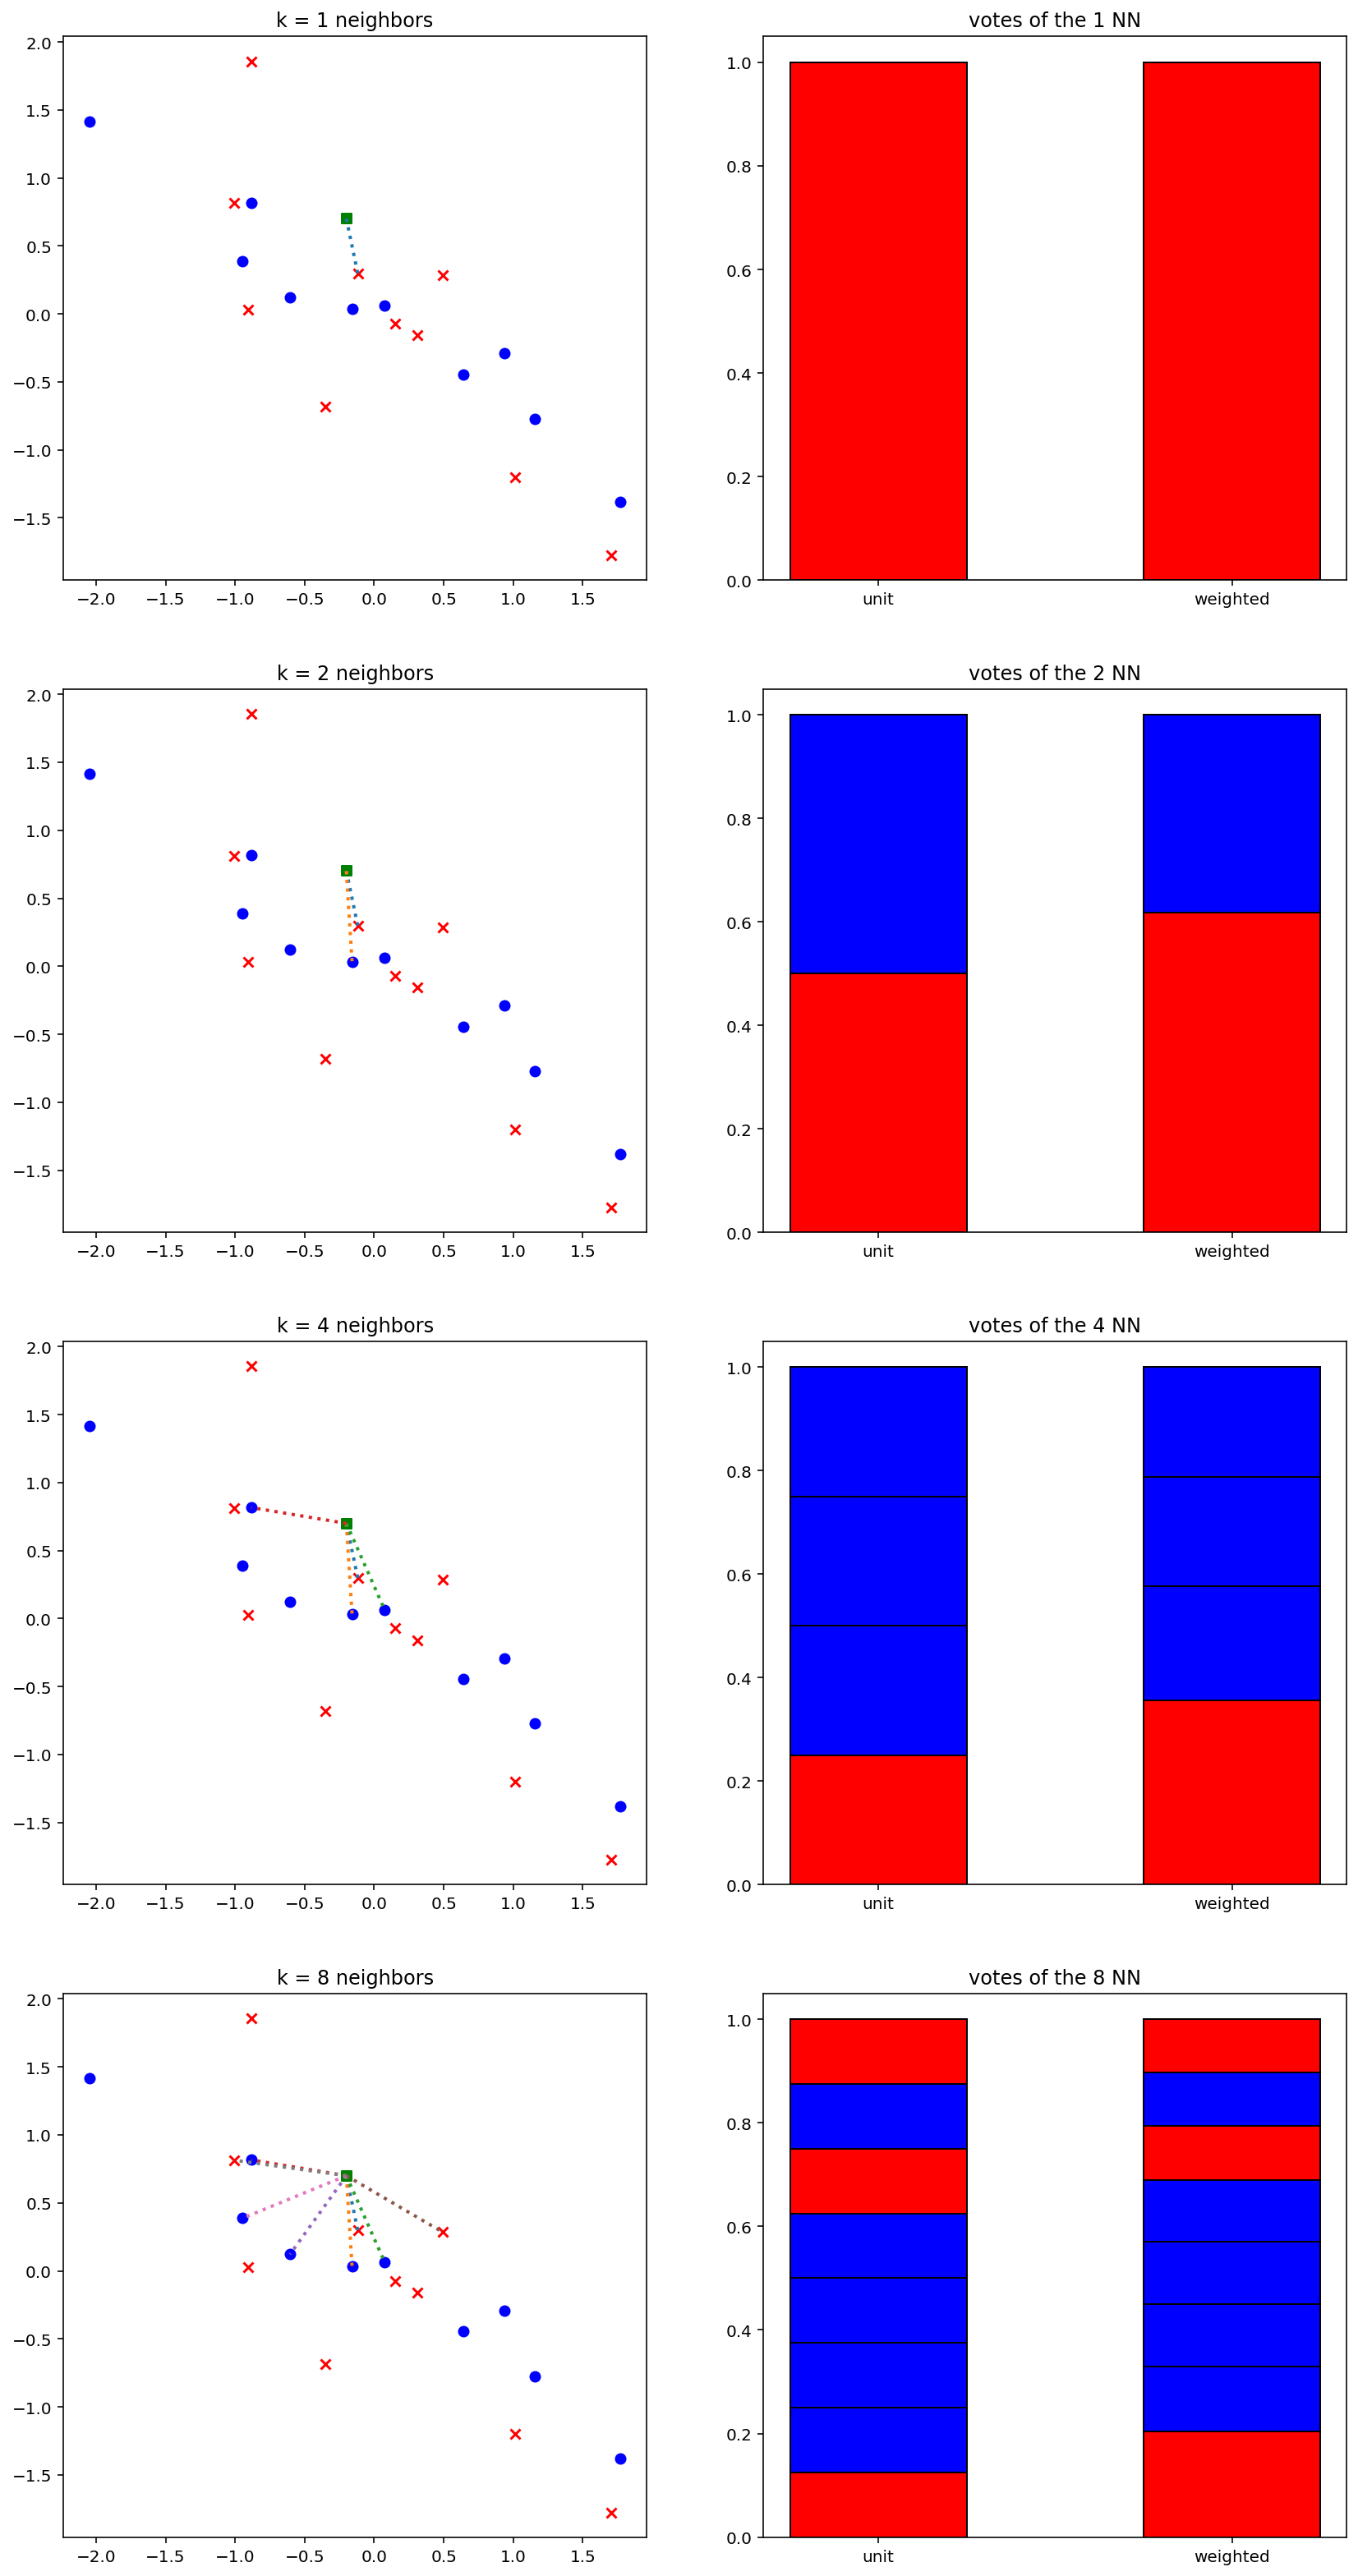

In [14]:
v_k = np.array([1,2,4,8])
ii=7
fx,ax = plt.subplots(len(v_k),2,figsize=(2*ii,len(v_k)*ii))
for ik,kk in enumerate(v_k):
  ax[ik][0].set_title('k = {0:d} neighbors'.format(kk))
  ax[ik][1].set_title('votes of the {0:d} NN'.format(kk))
  draw_example(ax[ik][0],x,y,xt) 
  draw_radius(xt,np.array([x[cc,:] for cc in id_neighbors[0,:kk]]),ax[ik][0])
  draw_votes(class_neighbors[0,:kk], weight_neighbor[0,:kk]/np.sum(weight_neighbor[0,:kk]), ax[ik][1])

# Slides 22-25

In [15]:
nn=60
nr = 40
zx,zy =make_moons(n_samples=nn, noise=0.5, random_state=0)
x = zx[:nr,:]
y = zy[:nr]
xt = zx[nr:,:]
yt = zy[nr:]


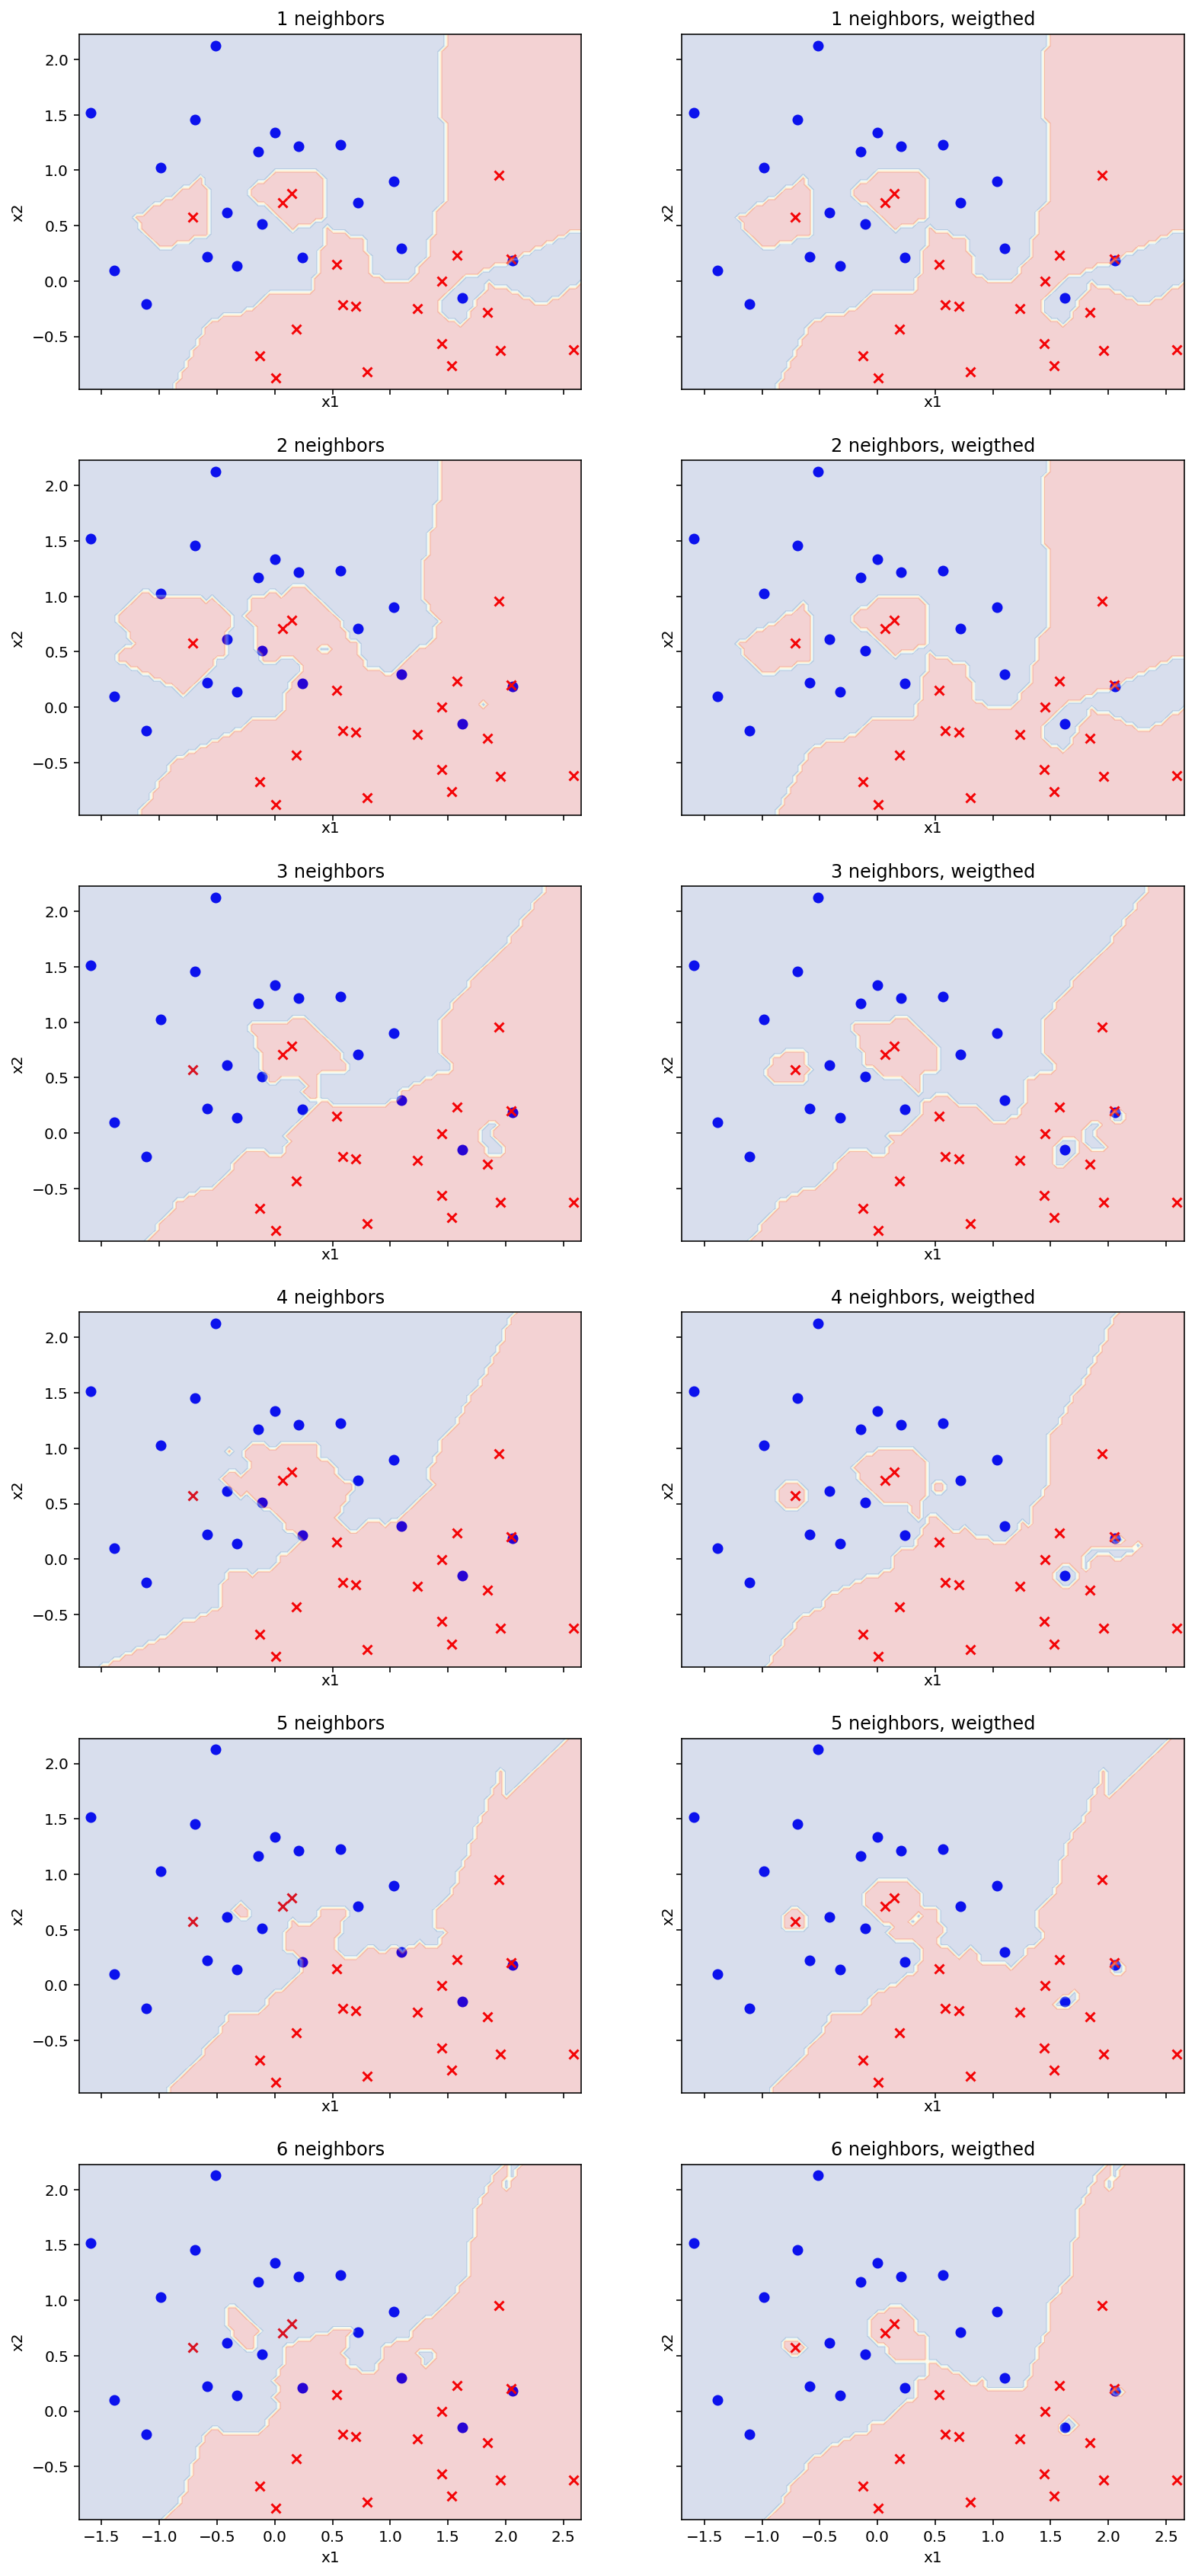

In [16]:

v_hh = [1,2,3,4,5,6]
fx,ax = plt.subplots(len(v_hh),2,sharex=True, sharey=True, figsize=(13,30))
cc=0
plot_step=0.05
x0 = x.copy()
x_min, x_max = x0[:, 0].min() - 0.1, x0[:, 0].max() + 0.1
y_min, y_max = x0[:, 1].min() - 0.1, x0[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

y1 = y.copy()
y1[y1==0] = -1
for cc,kk in enumerate(v_hh):
  clf = KNeighborsClassifier(n_neighbors=kk)
  clf.fit(x, -y1)
  draw_example(ax[cc][0],x,y)
  ax[cc][0].set_xlabel('x1')
  ax[cc][0].set_ylabel('x2')
  ax[cc][0].set_title("{0:d} neighbors".format(kk))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = ax[cc][0].contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.2)
  _ = ax[cc][0].set_ylim([y_min, y_max])

  clf = KNeighborsClassifier(n_neighbors=kk, weights='distance')
  clf.fit(x, -y1)
  draw_example(ax[cc][1],x,y)
  ax[cc][1].set_xlabel('x1')
  ax[cc][1].set_ylabel('x2')
  ax[cc][1].set_title("{0:d} neighbors, weigthed".format(kk))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = ax[cc][1].contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.2)
  _ = ax[cc][1].set_ylim([y_min, y_max])




# Slides 28 - 31

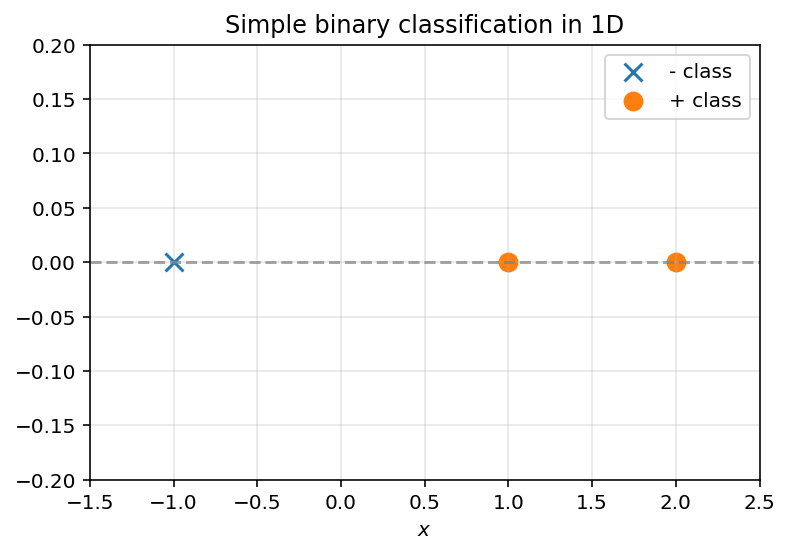

In [17]:
x = np.array([-1, 1,2])
y = np.array([-1,1,1])
plt.figure()
plt.plot([-1.5,2.5],[0, 0],color='gray', linestyle='--', linewidth=1.5, alpha=0.7)
plt.axis([-1.5,2.5,-0.2,0.2])
plt.scatter([x[0]], [0], marker='x', s=80, label='- class' )
plt.scatter(x[y==1], np.zeros(2), marker='o', s=80, label='+ class' )
plt.grid(alpha=0.3)

plt.xlabel('$x$')
plt.title('Simple binary classification in 1D')
_=plt.legend()

Text(0.5, 1.0, 'Stump all in same class, error = 0.33')

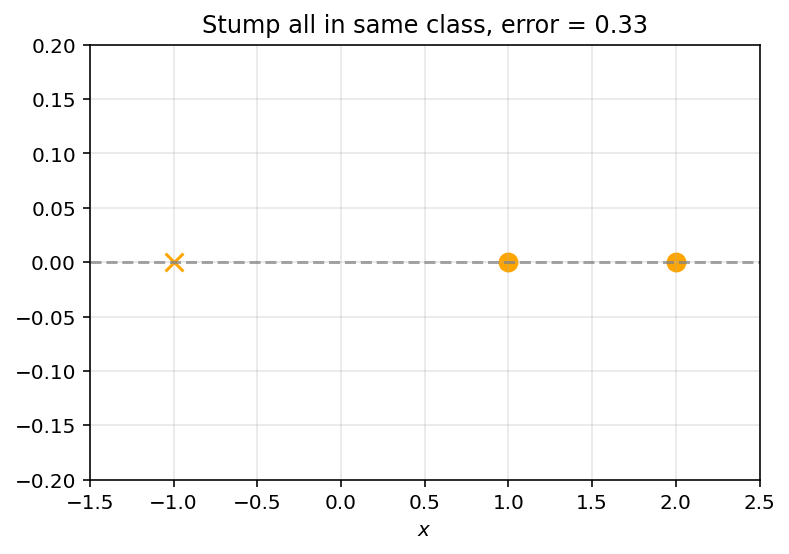

In [18]:
plt.figure()
plt.plot([-1.5,2.5],[0, 0],color='gray', linestyle='--', linewidth=1.5, alpha=0.7)
plt.axis([-1.5,2.5,-0.2,0.2])
plt.scatter([x[0]], [0], marker='x', s=80, label='- class', color='orange' )
plt.scatter(x[y==1], np.zeros(2), marker='o', s=80, label='+ class', color='orange' )
plt.grid(alpha=0.3)
#plt.plot([0,0],[-0.1, 0.1],color='black', label='stump classifier', linewidth=2)

plt.xlabel('$x$')
plt.title('Stump all in same class, error = 0.33')
#_=plt.legend()

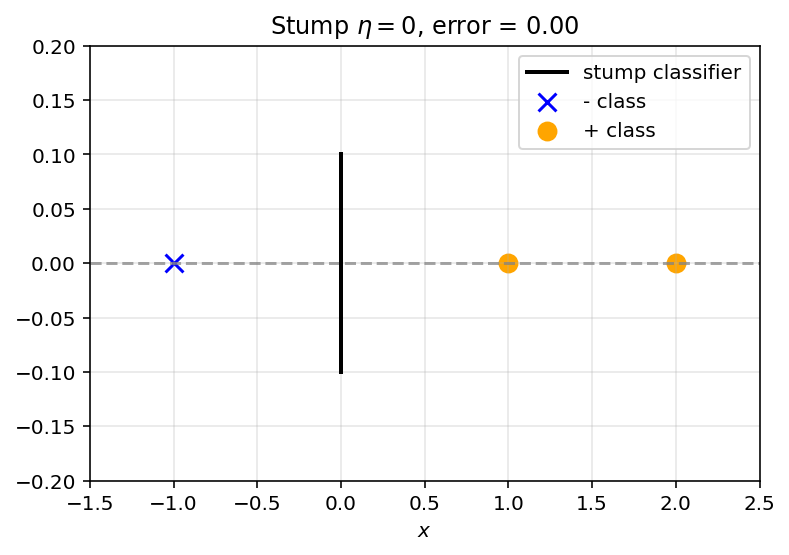

In [19]:

plt.figure()
plt.plot([-1.5,2.5],[0, 0],color='gray', linestyle='--', linewidth=1.5, alpha=0.7)
plt.axis([-1.5,2.5,-0.2,0.2])
plt.scatter([x[0]], [0], marker='x', s=80, label='- class', color='blue' )
plt.scatter(x[y==1], np.zeros(2), marker='o', s=80, label='+ class', color='orange' )
plt.grid(alpha=0.3)
plt.plot([0,0],[-0.1, 0.1],color='black', label='stump classifier', linewidth=2)

plt.xlabel('$x$')
plt.title('Stump $\eta=0$, error = 0.00')
_=plt.legend()

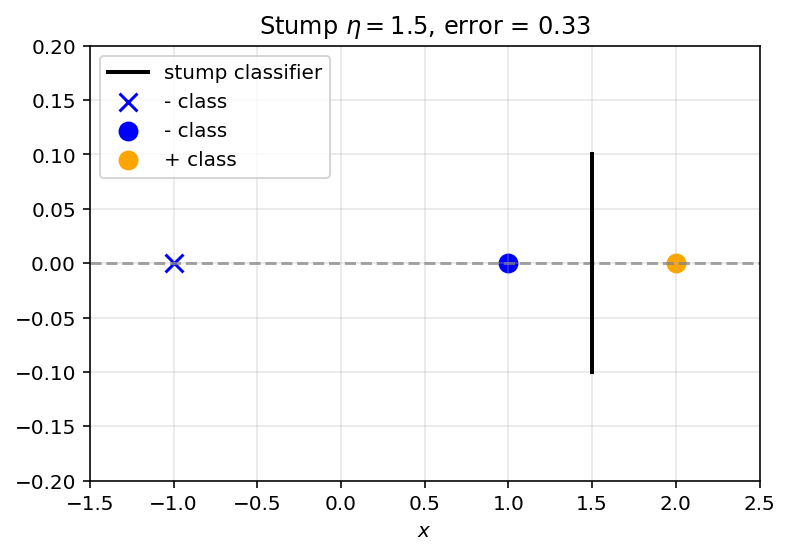

In [20]:
plt.figure()
plt.plot([-1.5,2.5],[0, 0],color='gray', linestyle='--', linewidth=1.5, alpha=0.7)
plt.axis([-1.5,2.5,-0.2,0.2])
plt.scatter([x[0]], [0], marker='x', s=80, label='- class', color='blue' )
plt.scatter([x[1]], [0], marker='o', s=80, label='- class', color='blue' )
plt.scatter(x[2], [0], marker='o', s=80, label='+ class', color='orange' )
plt.grid(alpha=0.3)
plt.plot([1.5,1.5],[-0.1, 0.1],color='black', label='stump classifier', linewidth=2)

plt.xlabel('$x$')
plt.title('Stump $\eta=1.5$, error = 0.33')
_=plt.legend()

# Slide 32

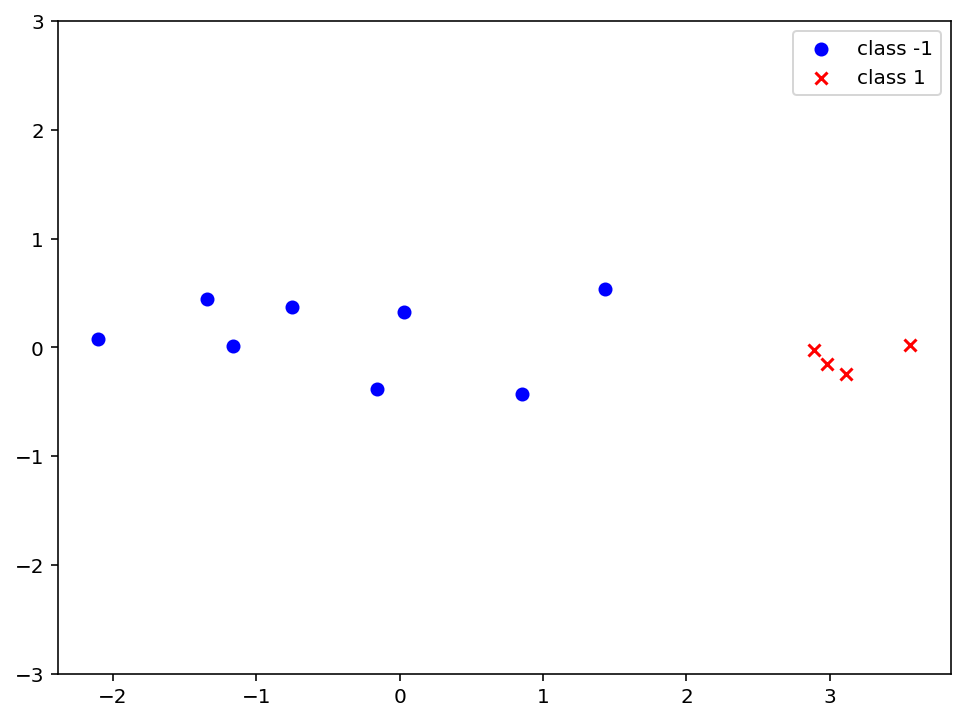

In [21]:
X1 = np.array([[-2.1 ,  0.08],
       [-1.16,  0.01],
       [-0.75,  0.37],
       [-1.34,  0.45],
       [-0.16, -0.38],
       [ 1.43,  0.54],
       [ 0.85, -0.43],
       [ 0.03,  0.33]])
X2 = np.array([[ 2.89, -0.02],
       [ 3.56,  0.02],
       [ 3.11, -0.24],
       [ 2.98, -0.15]])
n1 = X1.shape[0]
n2 = X2.shape[0]
X = np.vstack((X1,X2))
y = np.hstack((-np.ones(n1), np.ones(n2)))
ff,aa = plt.subplots(1,1,figsize=(8,6))
aa.scatter(X1[:,0],X1[:,1],marker='o', color='blue', label='class -1')
aa.scatter(X2[:,0],X2[:,1],marker='x', color='red', label='class 1')
_ = aa.set_ylim([-3,3])
_ = aa.legend()


# Slide 35

In [22]:
n_stumps = 4
np.random.seed(42)
umbrales_1 = np.empty(X.shape[0])
umbrales_1[0] = -10
umbrales_2 = np.empty(X.shape[0])
umbrales_2[0] = -10
X0s = np.sort(X[:,0])
X1s = np.sort(X[:,1])
for ii in range(1, X.shape[0]):
    umbrales_1[ii] = 0.5*(X0s[ii-1] + X0s[ii])
    umbrales_2[ii] = 0.5*(X1s[ii-1] + X1s[ii])


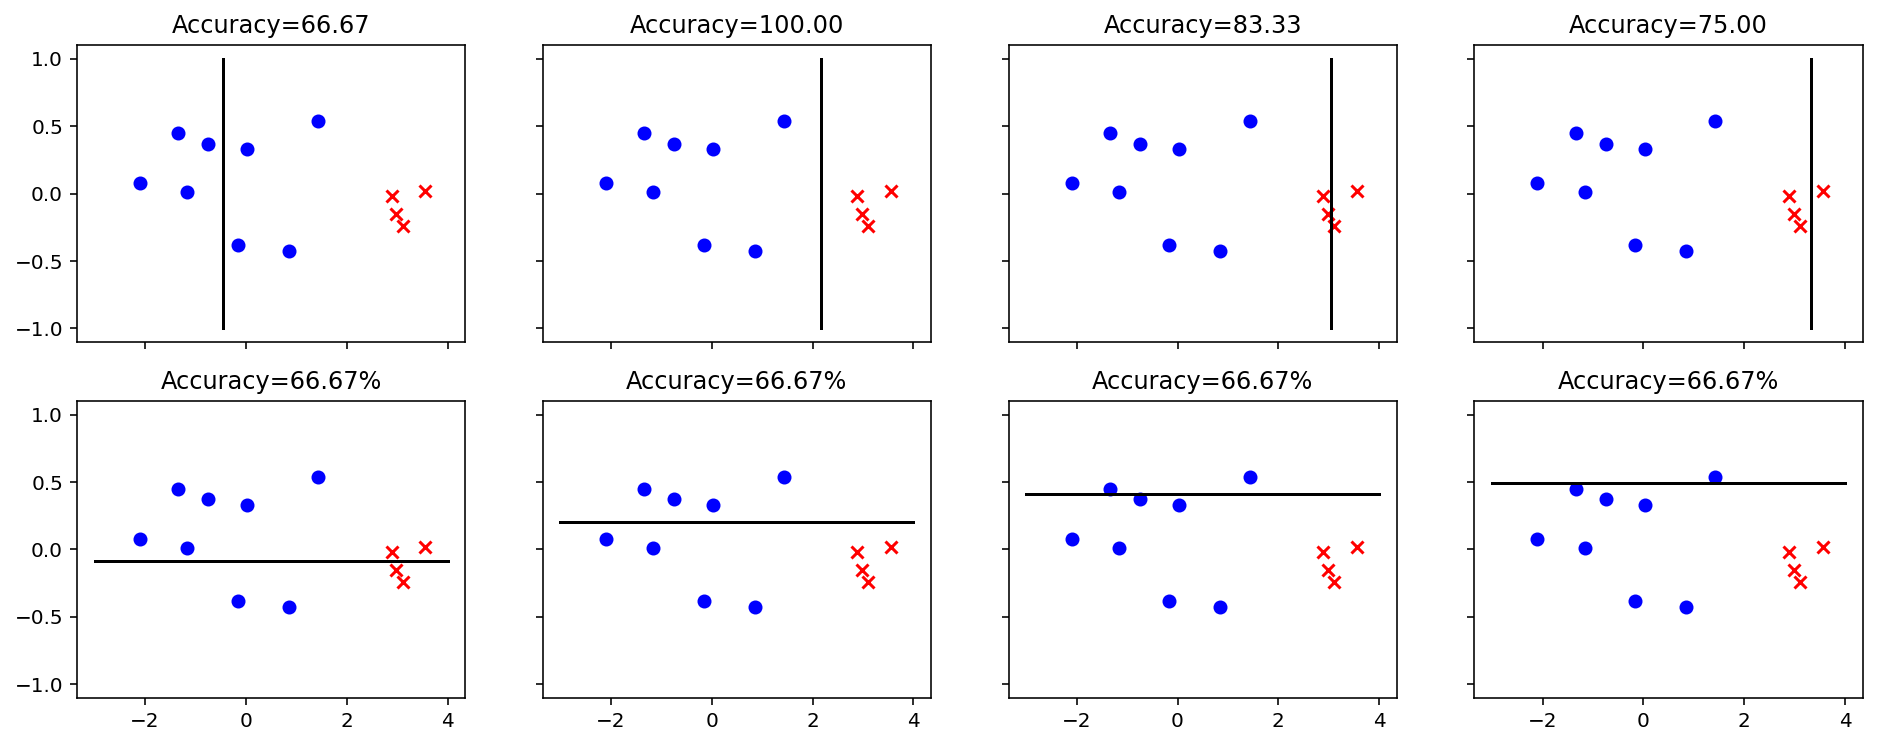

In [23]:
ff,aa = plt.subplots(2, n_stumps, sharex=True, sharey=True, figsize=(16,6))
list_stumps = []

v_jj = [4,8,10,11]
for ss in range(n_stumps):
    jj = v_jj[ss]
    aa[0][ss].scatter(X1[:,0],X1[:,1],marker='o', color='blue')
    aa[0][ss].scatter(X2[:,0],X2[:,1],marker='x', color='red')
    aa[0][ss].plot(umbrales_1[jj]*np.ones(2),
                  np.array([-1,1]), color='black')
    st = stump(v=0, u=umbrales_1[jj], x=X, y=y)
    pred = st.predict(X)
    aciertos = np.mean(pred==y)
    aa[0][ss].set_title('Accuracy={0:.2f}'.format(aciertos*100.))
    
    aa[1][ss].scatter(X1[:,0],X1[:,1],marker='o', color='blue')
    aa[1][ss].scatter(X2[:,0],X2[:,1],marker='x', color='red')
    aa[1][ss].plot(np.array([-3,4]), 
                   umbrales_2[jj]*np.ones(2),
                   color='black')
    
    st = stump(v=1, u=umbrales_2[jj], x=X, y=y)
    pred = st.predict(X)
    aciertos = np.mean(pred==y)
    aa[1][ss].set_title('Accuracy={0:.2f}%'.format(aciertos*100.))


# Slide 39

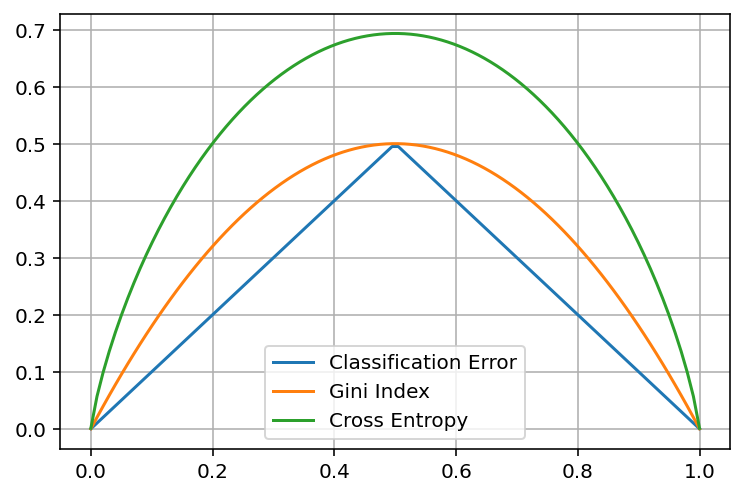

In [24]:
xx=np.linspace(1e-4,.9999,100)
error = np.min(np.vstack((xx,1-xx)),0)
gini = 2*xx*(1-xx)
entropia = -xx*np.log(xx)-(1-xx)*np.log(1-xx)
plt.figure()
plt.plot(xx,error,label='Classification Error')
plt.plot(xx,gini,label='Gini Index')
plt.plot(xx,entropia,label='Cross Entropy')
plt.legend()
plt.grid()


# Slide 46

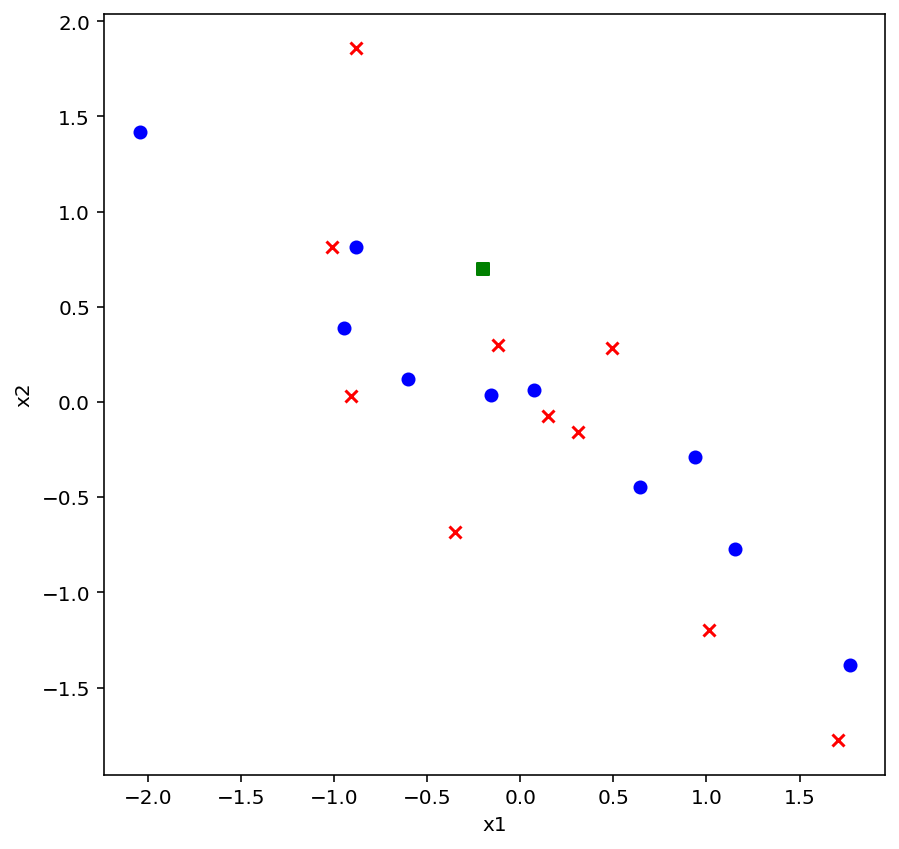

In [25]:
x,y = make_classification(n_samples=20, 
                          n_features=2,
                          n_informative=2, 
                          n_redundant=0,
                          n_repeated=0, 
                          n_classes=2, 
                          n_clusters_per_class=2,
                          weights=None, 
                          flip_y=0.01, 
                          class_sep=1.0, 
                          hypercube=False, 
                          shift=0.0, 
                          scale=1.0, 
                          shuffle=True, 
                          random_state=42)
xt = np.array([-0.2, 0.7])
fx,ax = plt.subplots(1,1,figsize=(7,7))
draw_example(ax,x,y,xt)
_=ax.set_xlabel('x1')
_=ax.set_ylabel('x2')


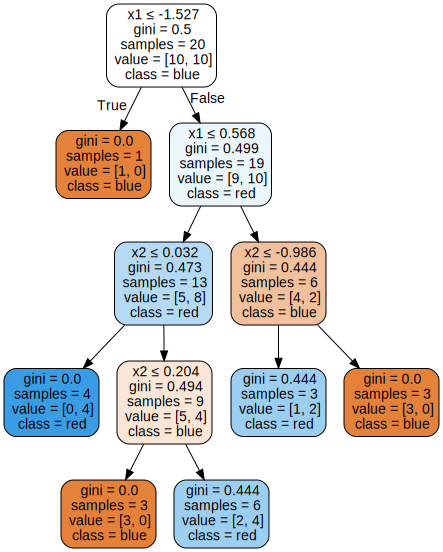

In [26]:
from sklearn.tree import DecisionTreeClassifier,export_text
DT = DecisionTreeClassifier(max_leaf_nodes=6,random_state=42)
DT.fit(x, y)

import graphviz
from sklearn import tree
dot_Data = tree.export_graphviz(DT, 
                                out_file=None, 
                                feature_names = ['x1','x2'],
                               class_names=['blue','red'],
                                filled=True, 
                                rounded=True,  
                              special_characters=True)
graph = graphviz.Source(dot_Data)
graph

# Slide 47

Text(0, 0.5, 'x2')

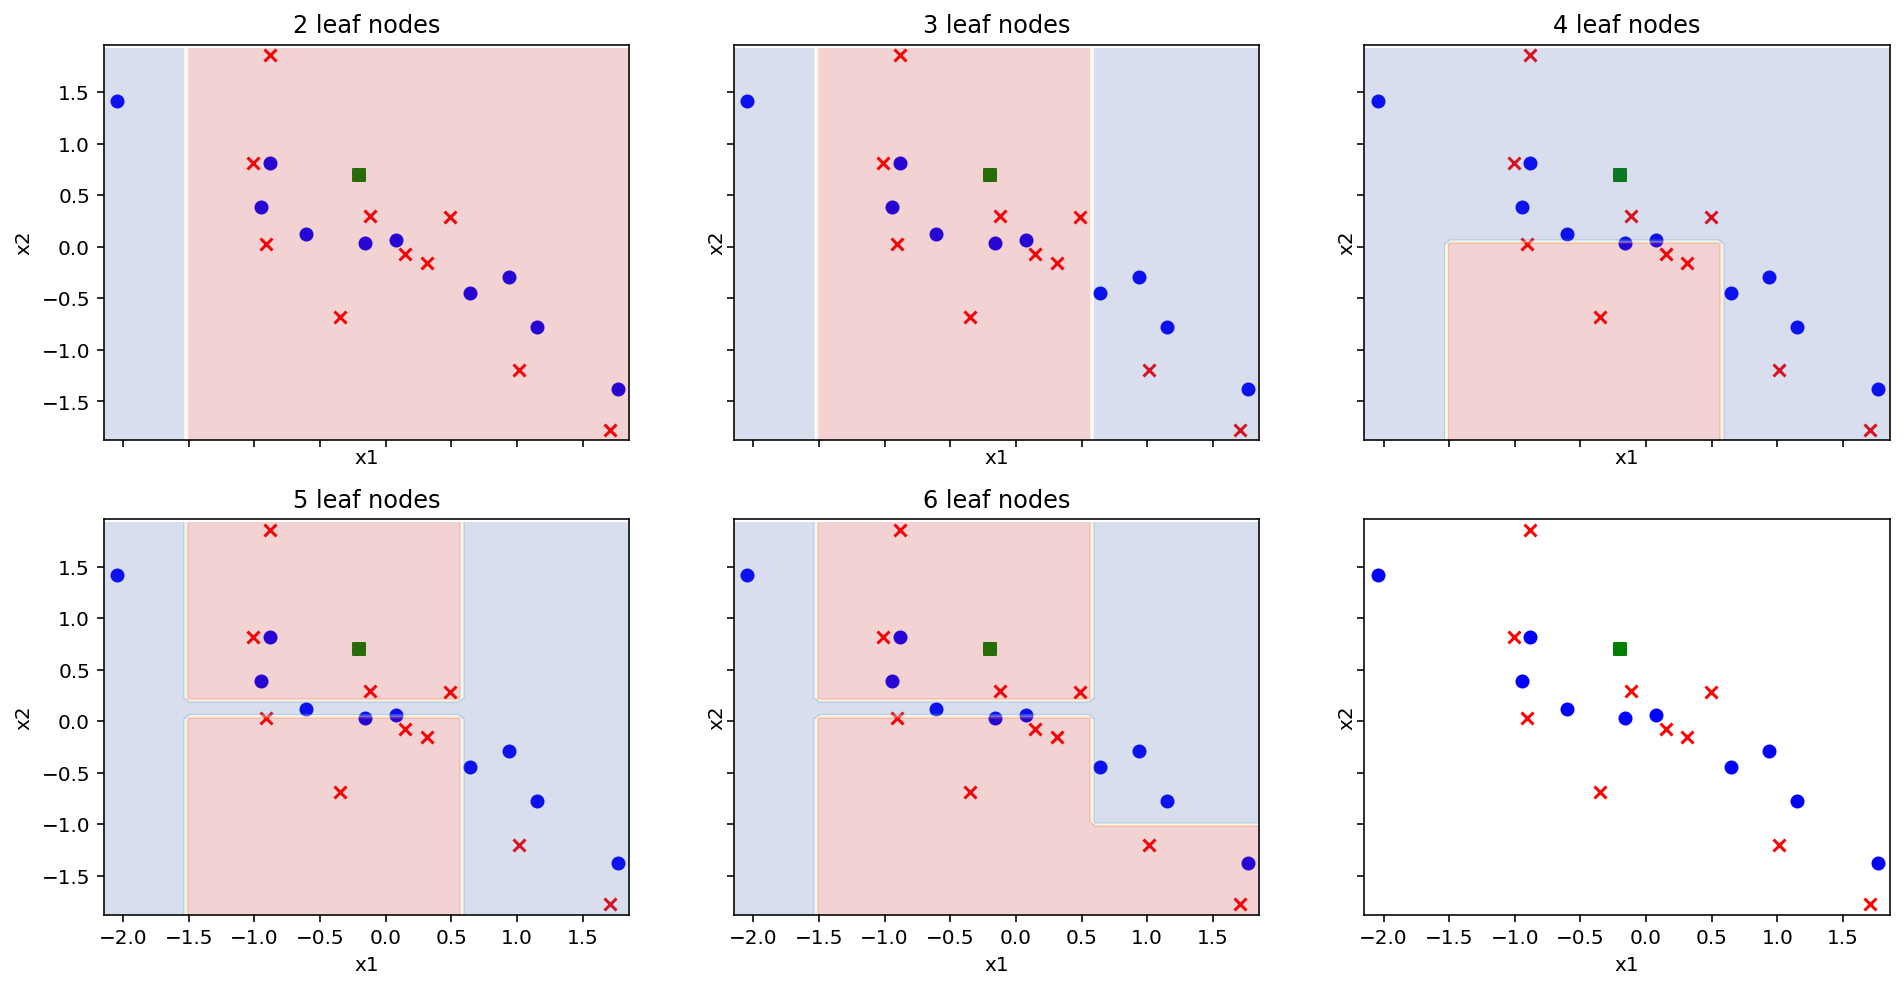

In [27]:
fx,ax = plt.subplots(2,3,sharex=True, sharey=True, figsize=(16,8))
cc=0
plot_step=0.05
x0 = x.copy()
x_min, x_max = x0[:, 0].min() - 0.1, x0[:, 0].max() + 0.1
y_min, y_max = x0[:, 1].min() - 0.1, x0[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
v_hh = [2,3,4,5,6]
y1 = y.copy()
y1[y1==0] = -1

list_aa = [ax[0][0], ax[0][1], ax[0][2], ax[1][0],ax[1][1]]
for cc in range(5):
    aa = list_aa[cc]
    DT = DecisionTreeClassifier(max_leaf_nodes=v_hh[cc],random_state=42)
    DT.fit(x, -y1)
    draw_example(aa,x,y,xt)
    aa.set_xlabel('x1')
    aa.set_ylabel('x2')

    Z = DT.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = aa.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.2)
    _ = aa.set_ylim([y_min, y_max])
    _ = aa.set_title("{0:d} leaf nodes".format(v_hh[cc]))
aa = ax[1][2]
draw_example(aa,x,y,xt)
aa.set_xlabel('x1')
aa.set_ylabel('x2')


# Slide 57

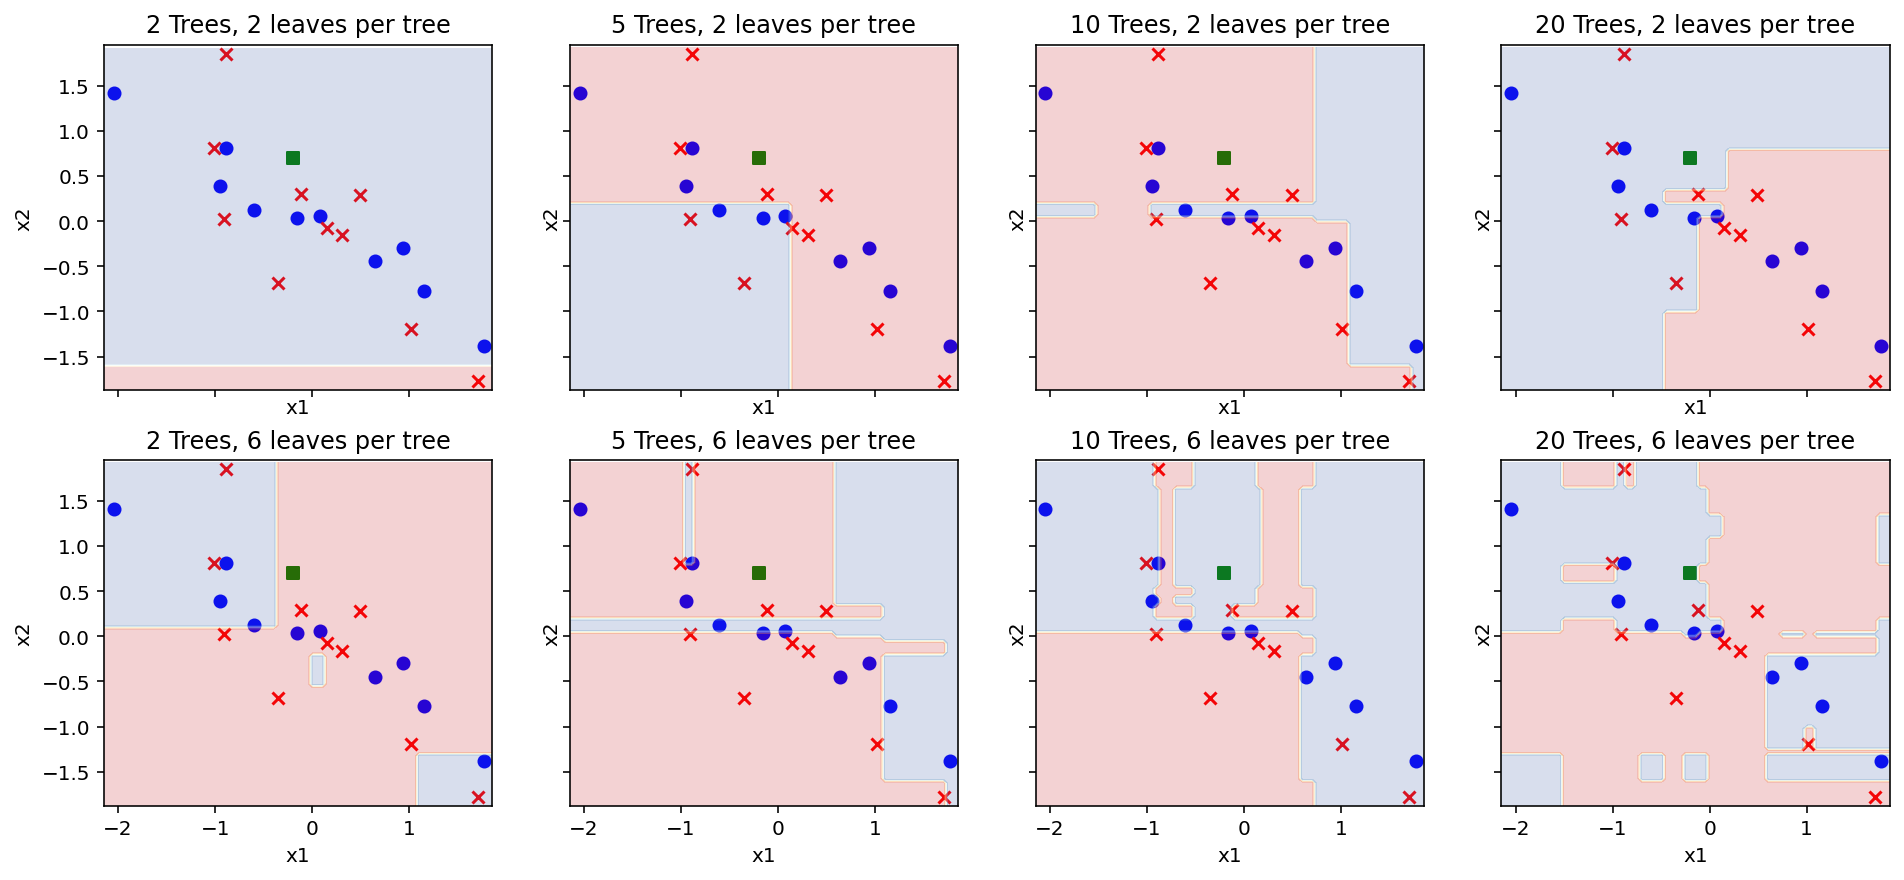

In [28]:
from sklearn.ensemble import RandomForestClassifier
v_hh = [2,5,10,20]
fx,ax = plt.subplots(2,len(v_hh),sharex=True, sharey=True, figsize=(16,7))
cc=0
plot_step=0.05
x_min, x_max = x0[:, 0].min() - 0.1, x0[:, 0].max() + 0.1
y_min, y_max = x0[:, 1].min() - 0.1, x0[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

y1 = y.copy()
y1[y1==0] = -1
for cc,kk in enumerate(v_hh):
  hojas=2
  clf = RandomForestClassifier(max_leaf_nodes=hojas,
                       n_estimators=kk)
  clf.fit(x, -y1)
  draw_example(ax[0][cc], x,y,xt)
  ax[0][cc].set_xlabel('x1')
  ax[0][cc].set_ylabel('x2')
  ax[0][cc].set_title("{0:d} Trees, {1:d} leaves per tree".format(kk, hojas))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = ax[0][cc].contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.2)
  _ = ax[0][cc].set_ylim([y_min, y_max])

  hojas=6
  clf = RandomForestClassifier(max_leaf_nodes=hojas,
                       n_estimators=kk)
  clf.fit(x, -y1)
  draw_example(ax[1][cc], x,y,xt)
  ax[1][cc].set_xlabel('x1')
  ax[1][cc].set_ylabel('x2')
  ax[1][cc].set_title("{0:d} Trees, {1:d} leaves per tree".format(kk, hojas))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = ax[1][cc].contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.2)
  _ = ax[1][cc].set_ylim([y_min, y_max])

# Train, validation and test



[]

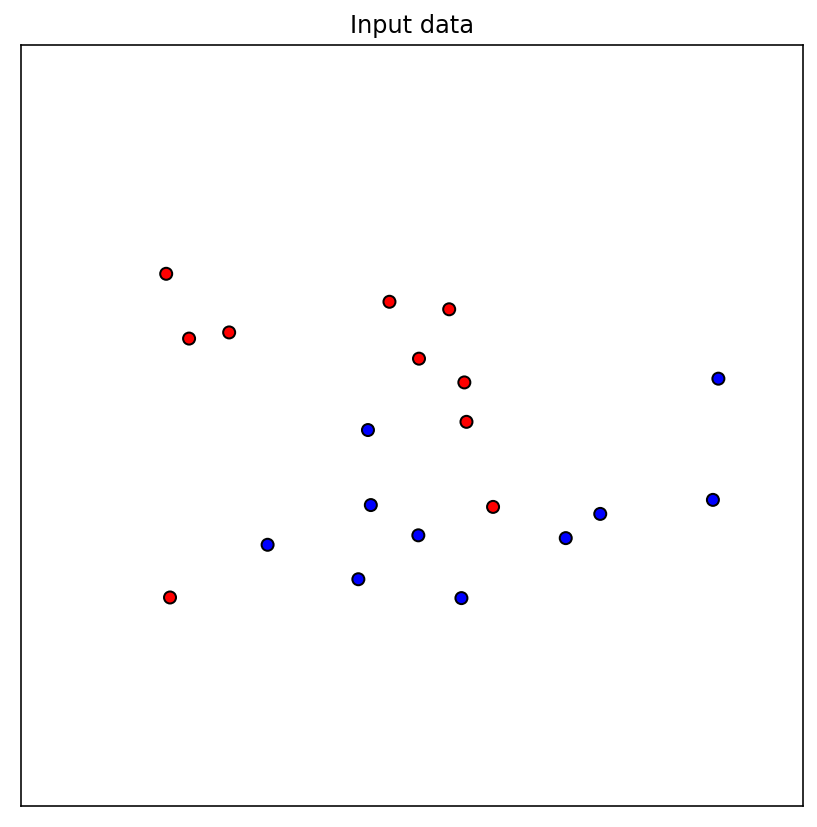

In [41]:
ff,ax = plt.subplots(1,1,figsize=(7,7))
X,y = make_moons(noise=0.3, random_state=0)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.8, random_state=42
)

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
ax.set_title("Input data")
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
 


In [42]:
params = {'n_neighbors':[1,3,5], 'weights':['uniform','distance']}
grid_clf = GridSearchCV(KNeighborsClassifier(), params)

In [43]:
grid_clf.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5],
                         'weights': ['uniform', 'distance']})

In [44]:
print(grid_clf.best_params_)

{'n_neighbors': 1, 'weights': 'uniform'}


In [45]:
print("Accuracy Training set: {0:.2f}".format(grid_clf.score(X_train,y_train)))
print("Accuracy Test set: {0:.2f}".format(grid_clf.score(X_test,y_test)))

Accuracy Training set: 1.00
Accuracy Test set: 0.89


[]

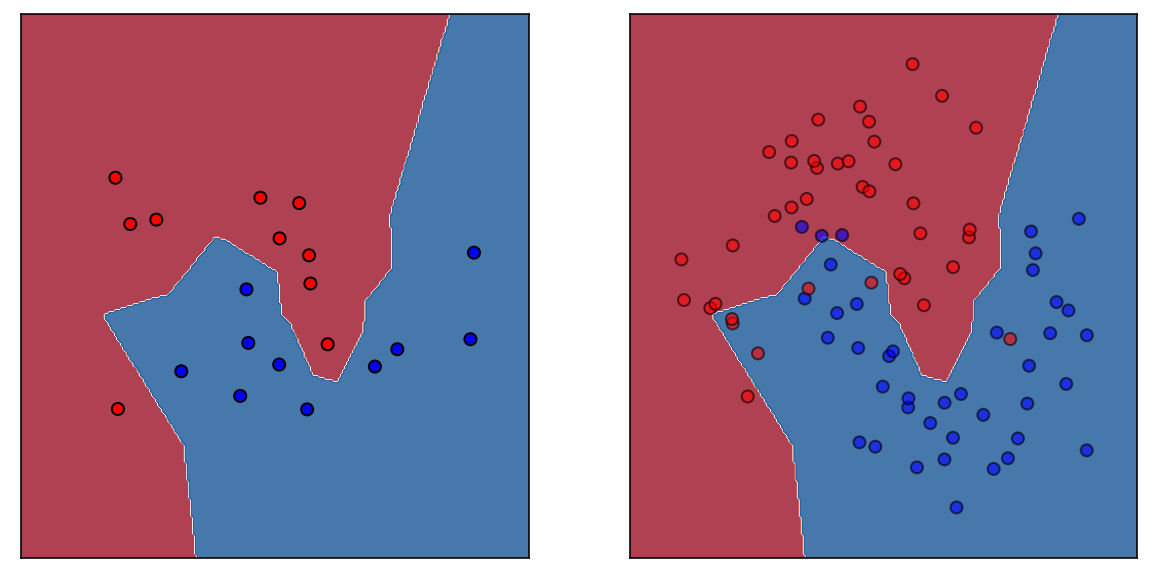

In [47]:
ff,aa = plt.subplots(1,2,figsize=(10,5))
Z = grid_clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax=aa[0]
ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

# Plot the training points
ax.scatter(
    X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax=aa[1]
ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
# Plot the testing points
ax.scatter(
    X_test[:, 0],
    X_test[:, 1],
    c=y_test,
    cmap=cm_bright,
    edgecolors="k",
    alpha=0.6,
)

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

In [50]:
# now with 5 neighbors and distance weighted votes

clf = KNeighborsClassifier(n_neighbors=5,weights='distance')
clf.fit(X_train, y_train)


KNeighborsClassifier(weights='distance')

Text(0.5, 1.0, 'Classification')

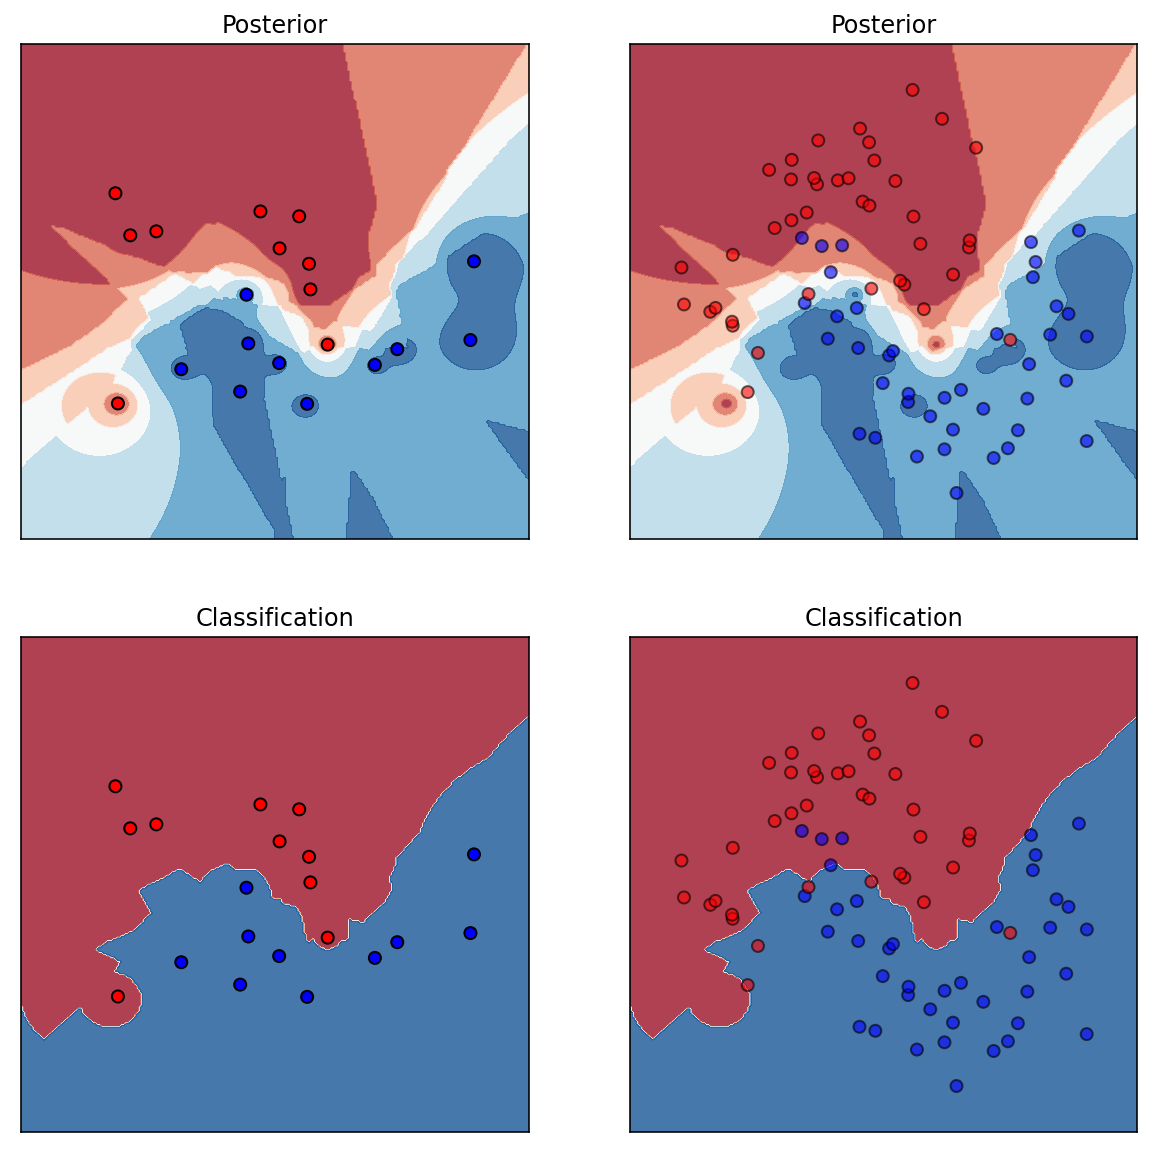

In [56]:
ff,aa = plt.subplots(2,2,figsize=(10,10))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax=aa[0][0]
ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

# Plot the training points
ax.scatter(
    X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Posterior')
ax=aa[0][1]
ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
# Plot the testing points
ax.scatter(
    X_test[:, 0],
    X_test[:, 1],
    c=y_test,
    cmap=cm_bright,
    edgecolors="k",
    alpha=0.6,
)

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Posterior')

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax=aa[1][0]
ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

# Plot the training points
ax.scatter(
    X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Classification')
ax=aa[1][1]
ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
# Plot the testing points
ax.scatter(
    X_test[:, 0],
    X_test[:, 1],
    c=y_test,
    cmap=cm_bright,
    edgecolors="k",
    alpha=0.6,
)

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Classification')